In [27]:
from os import getcwd
import glob
import numpy as np
import pandas as pd
import missingno as msno

Display Settings

In [28]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

In [29]:
dic = pd.read_excel('data/LCDataDictionary.xlsx')

In [30]:
dic

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


Load Data

In [31]:
csv_files = glob.glob(f'{getcwd()}/data/*.csv')
df = pd.concat((pd.read_csv(f, header=1, low_memory=False) for f in csv_files))

Descriptive Statistics

In [32]:
df.shape

(2132287, 151)

In [33]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132287 entries, 0 to 103547
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 2.4+ GB


In [35]:
df.dtypes

id                                            object 
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                          object 
int_rate                                      object 
installment                                   float64
grade                                         object 
sub_grade                                     object 
emp_title                                     object 
emp_length                                    object 
home_ownership                                object 
annual_inc                                    float64
verification_status                           object 
issue_d                                       object 
loan_status                                   object 
pymnt_plan                                    object 
url                         

In [36]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132252e+06,2.130782e+06,2.132227e+06,2.132256e+06,2.132256e+06,2.132226e+06,1.045950e+06,343706.000000,2.132227e+06,2.132227e+06,2.132256e+06,2.132227e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132111e+06,551595.000000,2132256.0,1.039280e+05,103924.000000,2.132227e+06,2.061980e+06,2.061980e+06,1.266126e+06,1.266127e+06,1.266127e+06,1.266127e+06,1.226810e+06,1.266127e+06,1.083680e+06,1.266127e+06,1.266127e+06,1.266127e+06,1.265945e+06,2.061980e+06,1.266127e+06,1.266126e+06,1.266126e+06,2.082226e+06,2.061923e+06,2.059012e+06,2.057939e+06,2.132111e+06,2.132227e+06,1.997663e+06,2.061979e+06,2.061979e+06,2.061980e+06,2.082226e+06,2.060435e+06,494532.000000,1.852868e+06,703577.000000,2.061980e+06,2.061980e+06,2.061980e+06,2.073666e+06,2.061980e+06,2.061980e+06,2.061980e+06,2.061979e+06,2.061980e+06,2.073666e+06,1.981458e+06,2.061980e+06,2.061980e+06,2.061980e+06,2.061825e+06,2.058569e+06,2.130891e+06,2.132151e+06,2.061980e+06,2.082226e+06,2.082226e+06,2.061980e+06,91238.000000,91239.000000,91239.000000,91239.000000,91239.000000,91239.000000,89660.000000,91239.000000,91239.000000,91239.000000,91239.000000,30788.000000,8929.0,8929.000000,8929.0,8929.000000,7149.000000,8929.000000,8929.000000,26882.000000,26882.000000,26882.000000
mean,NaN,1.499126e+04,1.498568e+04,1.496652e+04,4.447609e+02,7.770306e+04,1.875749e+01,3.116394e-01,6.981561e+02,7.021563e+02,5.846524e-01,3.441518e+01,71.691737,1.161531e+01,2.020854e-01,1.664403e+04,2.425199e+01,4.921856e+03,4.920592e+03,1.126604e+04,1.124726e+04,8.855224e+03,2.287546e+03,1.267366e+00,1.220069e+02,2.005868e+01,3.254772e+03,6.891555e+02,6.779490e+02,1.815712e-02,44.037827,1.0,1.220217e+05,19.255889,4.397749e-03,2.354985e+02,1.422244e+05,9.339039e-01,2.781354e+00,6.751495e-01,1.561746e+00,2.132548e+01,3.542899e+04,6.923370e+01,1.299690e+00,2.771134e+00,5.780462e+03,5.730949e+01,3.427450e+04,1.002553e+00,1.472981e+00,2.052870e+00,4.530225e+00,1.353033e+04,1.115036e+04,5.838316e+01,8.547397e-03,1

In [37]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000e+00,9.997369e-01,0.998966,0.946102,0.196934,0.042638,-0.008065,0.110022,0.110021,-0.027227,-0.012286,0.009907,0.182920,-0.058325,0.317053,0.201554,0.488211,0.488217,0.620906,0.621001,0.549977,0.565962,0.070521,0.116869,0.111615,0.311107,0.098965,0.081744,-0.021444,0.004065,NaN,0.325535,0.061774,-0.000173,-0.004549,0.312285,-0.021553,0.033100,-1.929100e-07,0.023730,-0.014609,0.150685,-0.088441,-0.045740,-0.034356,0.365392,0.002160,0.326582,-0.000161,0.074683,0.009518,-0.000094,0.227533,0.203344,0.049457,-0.003317,0.001020,0.125785,0.167543,0.052888,0.027593,0.221232,0.037341,-0.032821,0.002456,-0.024645,-0.052961,0.191190,0.149626,0.212153,0.192757,0.081165,0.162214,0.164221,0.148920,0.180544,-0.001684,0.001200,-0.023388,-0.026454,0.088796,0.021331,-0.084848,0.008613,0.336590,0.276994,0.371061,0.208202,0.365820,0.224134,0.224134,-0.066350,0.194671,0.215562,0.023527,0.058038,0.201006,-0.049502,-0.077093,0.104562,NaN,0.714686,NaN,0.043902,0.714096,0.850290,0.468250,0.810401,-0.063440,0.224068
funded_amnt,NaN,9.997369e-01,1.000000e+00,0.999292,0.946471,0.196893,0.042859,-0.007951,0.109563,0.109562,-0.027531,-0.012291,0.009897,0.183096,-0.058179,0.316978,0.201466,0.488701,0.488706,0.620742,0.620898,0.549845,0.565772,0.070534,0.116839,0.111654,0.311089,0.098930,0.081718,-0.021376,0.004066,NaN,0.325536,0.061777,-0.000136,-0.004549,0.312285,-0.021552,0.033101,6.017645e-07,0.023732,-0.014609,0.150686,-0.088441,-0.045740,-0.034354,0.365392,0.002159,0.326582,-0.000160,0.074684,0.009519,-0.000094,0.227534,0.203349,0.049452,-0.003269,0.001031,0.125785,0.167544,0.052889,0.027593,0.221231,0.037340,-0.032821,0.002457,-0.024643,-0.052961,0.191191,0.149627,0

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10159611,NaN,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,MORTGAGE,102000.0,Not Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=10159611,NaN,debt_consolidation,Clean Up,027xx,MA,15.55,2.0,Oct-1989,670.0,674.0,0.0,11.0,NaN,9.0,0.0,9912.0,44.4%,22.0,f,0.0,0.0,11560.462185,11560.46,10000.0,1560.46,0.0,0.0,0.0,Jan-2017,320.91,NaN,Dec-2016,629.0,625.0,0.0,54.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,39143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN,3.0,4349.0,973.0,89.4,0.0,0.0,243.0,290.0,23.0,8.0,0.0,25.0,11.0,8.0,11.0,1.0,3.0,4.0,3.0,6.0,9.0,6.0,13.0,4.0,9.0,0.0,0.0,0.0,1.0,77.3,66.7,0.0,0.0,58486.0,39143.0,9200.0,36186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,10159498,NaN,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=10159498,NaN,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-1994,760.0,764.0,1.0,43.0,NaN,12.0,0.0,13168.0,21.6%,22.0,w,0.0,0.0,13263.954639,13263.95,12000.0,1263.95,0.0,0.0,0.0,Jan-2017,368.20,NaN,Oct-2018,814.0,810.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,267646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100.0,NaN,NaN,NaN,4.0,26765.0,39432.0,25.0,0.0,0.0,146.0,237.0,20.0,3.0,4.0,20.0,NaN,3.0,43.0,0.0,2.0,2.0,5.0,5.0,9.0,8.0,9.0,2.0,12.0,0.0,0.0,0.0,2.0,95.5,0.0,0.0,0.0,333044

In [39]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
103543,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49%,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=88985880,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9%,37.0,f,26449.73,26449.73,20606.13,20606.13,13550.27,7055.86,0.00,0.0,0.0,Oct-2018,859.56,Nov-2018,Oct-2018,729.0,725.0,0.0,10.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,28398.0,0.0,2.0,0.0,1.0,15.0,19765.0,46.0,0.0,0.0,5141.0,51.0,13300.0,3.0,0.0,2.0,2.0,5680.0,4070.0,66.9,0.0,0.0,154.0,258.0,33.0,15.0,3.0,41.0,9.0,1.0,9.0,6.0,2.0,3.0,2.0,15.0,9.0,3.0,23.0,3.0,5.0,0.0,0.0,7.0,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
103544,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49%,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=88224441,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1%,31.0,f,0.00,0.00,6755.40,6755.40,3521.91,3233.49,0.00,0.0,0.0,Oct-2017,564.56,NaN,Oct-2018,549.0,545.0,0.0,67.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,62426.0,0.0,2.0,0.0,2.0,20.0,44785.0,78.0,1.0,5.0,6172.0,73.0,25900.0,0.0,0.0,1.0,7.0,6243.0,4660.0,77.5,0.0,0.0,132.0,206.0,9.0,9.0,2.0,9.0,NaN,9.0,NaN,1.0,5.0,7.0,5.0,15.0,4.0,8.0,24.0,7.0,10.0,0.0,0.0,0.0,1.0,96.2,40.0,

In [40]:
df.sample(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
65917,128136695,NaN,15000.0,15000.0,15000.0,60 months,11.99%,333.60,B,B5,Loan Processor,1 year,RENT,60000.00,Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=128136695,NaN,credit_card,Credit card refinancing,802xx,CO,22.28,0.0,Oct-2004,680.0,684.0,0.0,75.0,47.0,16.0,1.0,12262.0,36.3%,24.0,w,13477.76,13477.76,2658.810000,2658.81,1522.24,1136.57,0.00,0.00,0.0000,Oct-2018,333.60,Nov-2018,Oct-2018,724.0,720.0,0.0,75.0,1.0,Individual,NaN,NaN,NaN,0.0,95.0,30925.0,2.0,2.0,1.0,2.0,10.0,18663.0,66.0,4.0,5.0,4753.0,50.0,33800.0,1.0,0.0,2.0,7.0,1933.0,12055.0,49.3,0.0,0.0,31.0,160.0,1.0,1.0,0.0,1.0,75.0,6.0,75.0,1.0,4.0,6.0,5.0,8.0,5.0,14.0,19.0,6.0,16.0,0.0,0.0,0.0,5.0,95.7,0.0,1.0,0.0,61909.0,30925.0,23800.0,28109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
62183,124021173,NaN,30000.0,30000.0,30000.0,60 months,10.42%,643.63,B,B3,Director of Project Management,7 years,MORTGAGE,125000.00,Not Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=124021173,NaN,credit_card,Credit card refinancing,641xx,MO,8.45,0.0,Jun-1999,705.0,709.0,0.0,NaN,NaN,15.0,0.0,27103.0,40.9%,26.0,w,25598.22,25598.22,7062.560000,7062.56,4401.78,2660.78,0.00,0.00,0.0000,Oct-2018,643.63,Nov-2018,Oct-2018,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,170389.0,1.0,1.0,1.0,1.0,1.0,15844.0,99.0,1.0,2.0,6278.0,52.0,66200.0,0.0,6.0,0.0,3.0,11359.0,18225.0,52.5,0.0,0.0,218.0,221.0,7.0,1.0,1.0,7.0,NaN,20.0,NaN,0.0,6.0,9.0,8.0,

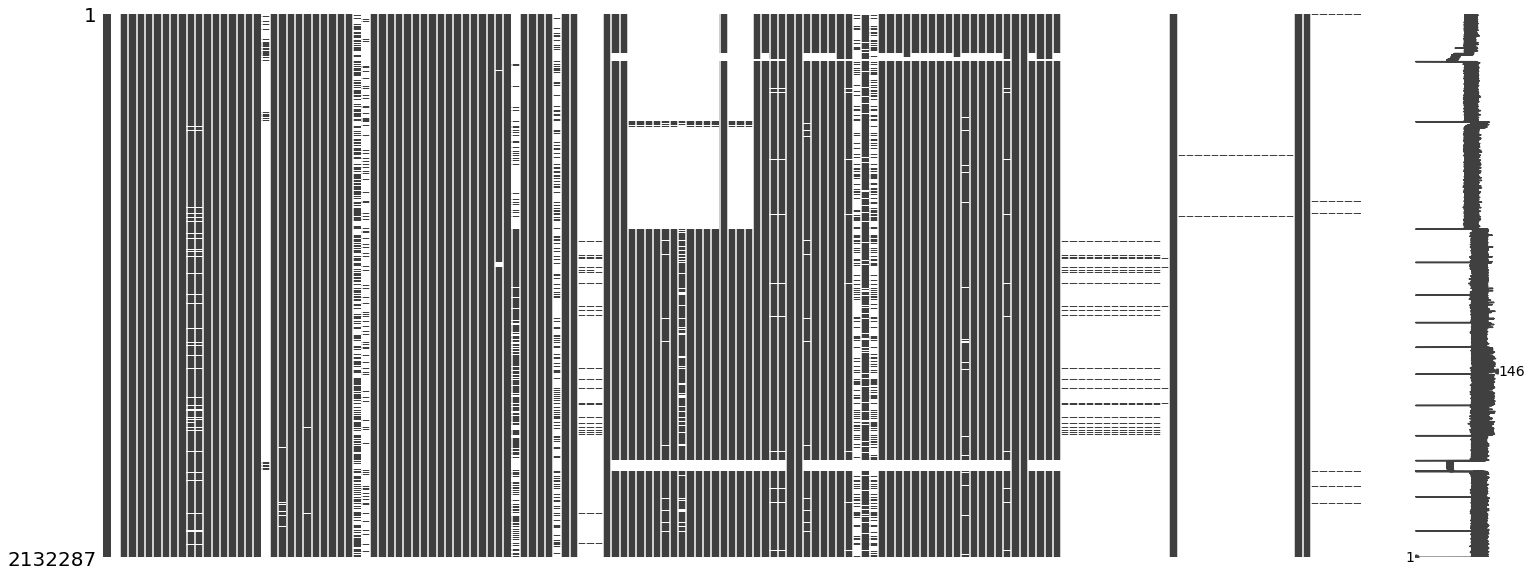

In [41]:
msno.matrix(df)

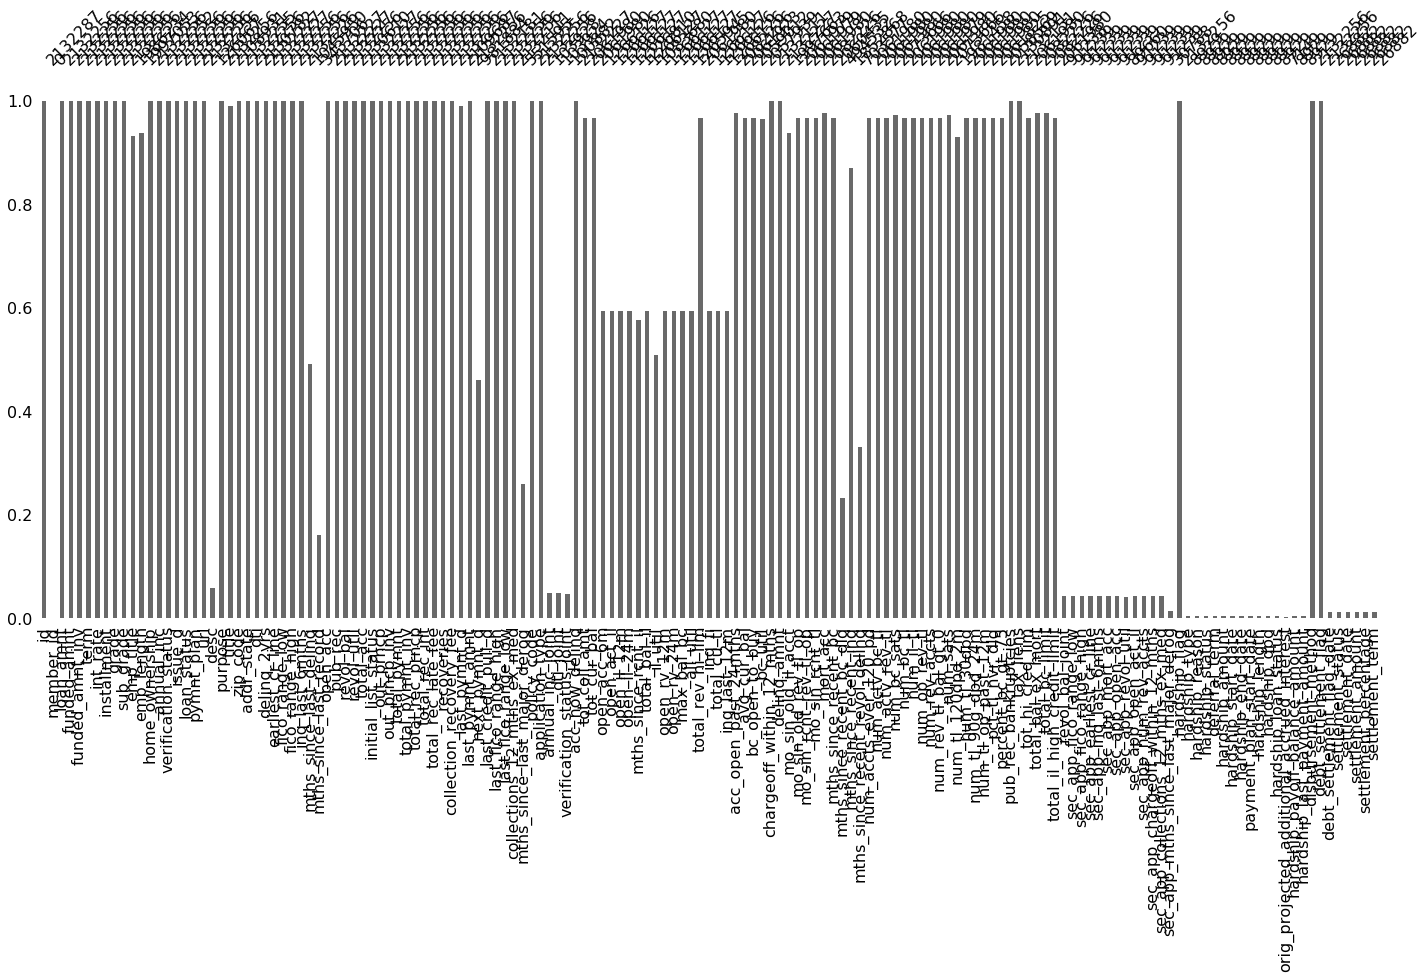

In [42]:
msno.bar(df)

In [43]:
loan_status = df.loan_status

In [44]:
loan_status.shape

(2132287,)

In [45]:
loan_status.head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [46]:
loan_status.value_counts()

Current                                                922081
Fully Paid                                             920849
Charged Off                                            229523
Late (31-120 days)                                     22951 
Issued                                                 13621 
In Grace Period                                        12665 
Late (16-30 days)                                      6776  
Does not meet the credit policy. Status:Fully Paid     1988  
Default                                                1041  
Does not meet the credit policy. Status:Charged Off    761   
Name: loan_status, dtype: int64

In [47]:
df_ids = df[['id', 'member_id']]

In [48]:
df_ids.shape

(2132287, 2)

In [49]:
df_ids.head()

,id,member_id
0,10159611,NaN
1,10159498,NaN
2,10129506,NaN
3,10149342,NaN
4,10149488,NaN


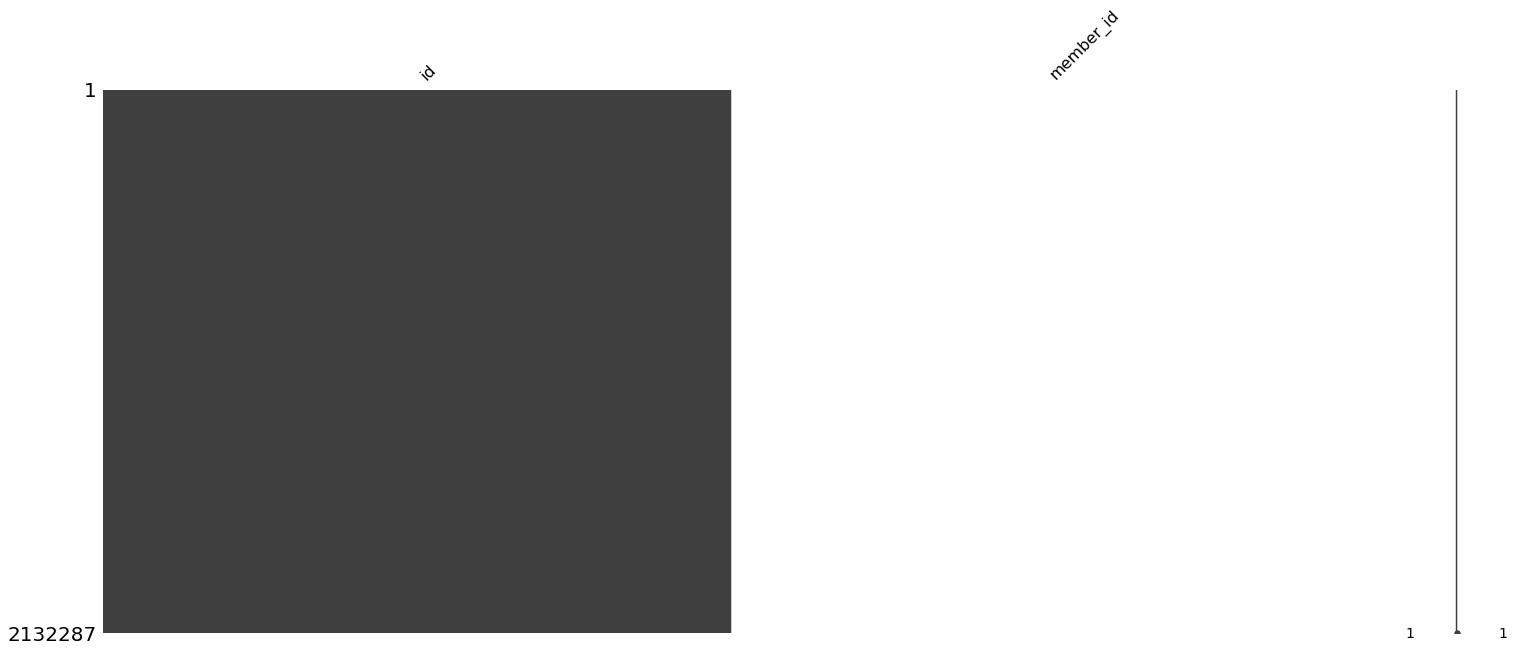

In [50]:
msno.matrix(df_ids)

In [52]:
df_ids.id.value_counts()

1621615      1
104046966    1
120067549    1
74551118     1
91416150     1
130267799    1
125990167    1
58694010     1
1049278      1
124014843    1
76053953     1
65493433     1
117225630    1
31286585     1
140669653    1
74705368     1
65170444     1
61592640     1
138084644    1
120090080    1
18494861     1
55911485     1
8559348      1
20508517     1
61522949     1
131875656    1
129231300    1
127181560    1
16542460     1
136531348    1
76905337     1
137804600    1
77100774     1
131574392    1
86403248     1
99935860     1
108559546    1
6521759      1
61309593     1
117060435    1
86412604     1
133481359    1
101137861    1
41267629     1
134749852    1
110836592    1
90805533     1
45474928     1
125366427    1
16362455     1
60635200     1
6616383      1
64067168     1
69402409     1
807180       1
60760244     1
33511218     1
134954505    1
12004773     1
91903684     1
116565892    1
24003341     1
107609558    1
137127825    1
100475158    1
93542217     1
71857100  